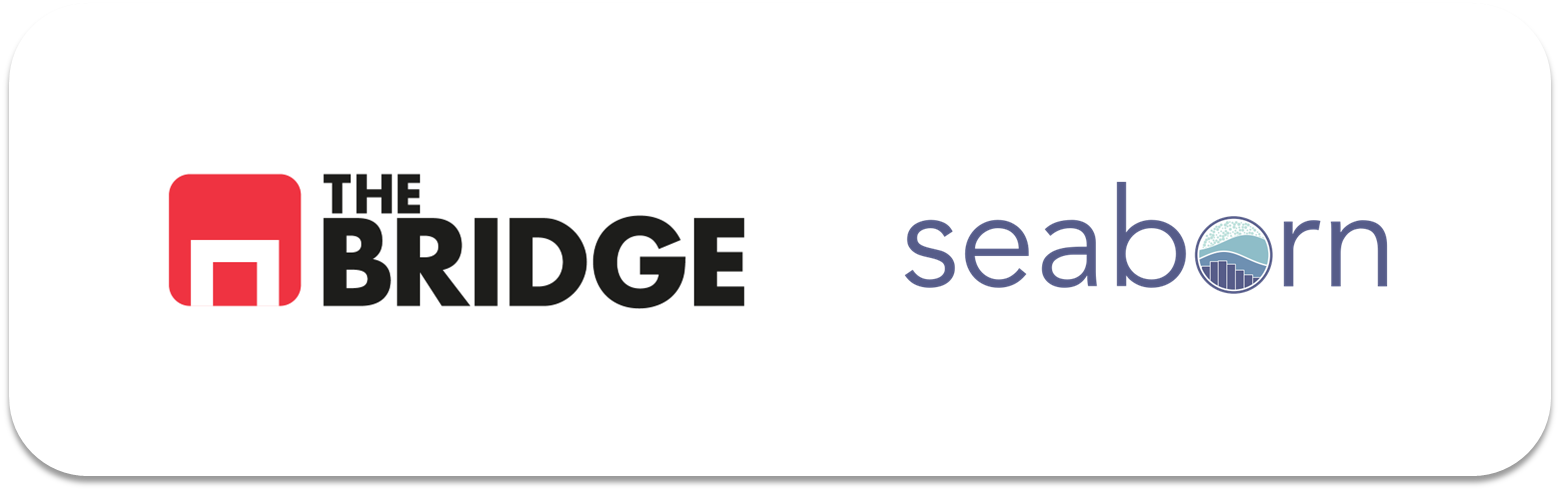

## PRACTICA OBLIGATORIA: **Visualización y Presentación**

* La práctica obligatoria de esta unidad se divide en dos partes, una dedicada a visualización y construcción de funciones, y la otra a hacer una presentación de resultados. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.options.mode.copy_on_write = True # CoW por defecto a partir de pandas 3.0.0

## #1 VISUALIZACION

### #1.1

Carga el dataset de las ciudades de California que está en la ruta "./data/california_cities.csv". Muestra su contenido, deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("./data/california_cities.csv", index_col= 0)
df = df.dropna()
df

city       latd       longd  elevation_m  elevation_ft  \
0       Adelanto  34.576111 -117.432778        875.0        2871.0   
1    AgouraHills  34.153333 -118.761667        281.0         922.0   
4       Alhambra  34.081944 -118.135000        150.0         492.0   
5     AlisoViejo  33.575000 -117.725556        127.0         417.0   
6        Alturas  41.487222 -120.542500       1332.0        4370.0   
..           ...        ...         ...          ...           ...   
477   Yountville  38.403056 -122.362222         30.0          98.0   
478        Yreka  41.726667 -122.637500        787.0        2582.0   
479     YubaCity  39.134722 -121.626111         18.0          59.0   
480      Yucaipa  34.030278 -117.048611        798.0        2618.0   
481  YuccaValley  34.133333 -116.416667       1027.0        3369.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
0               31765            56.027           56.009             0.018   
1               20330             7.822            7.793             0.029   
4               83089             7.632            7.631             0.001   
5               47823             7.472            7.472             0.000   
6                2827             2.449            2.435             0.014   
..                ...               ...              ...               ...   
477              2933             1.531            1.531             0.000   
478              7765            10.053            9.980             0.073   
479             64925            14.656           14.578             0.078   
480             51367            27.893           27.888             0.005   
481             20700            40.015           40.015             0.000   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  
0           145.107        145.062           0.046                0.03  
1            20.260         20.184           0.076                0.37  
4            19.766         19.763           0.003                0.01  
5            19.352         19.352           0.000                0.00  
6             6.342          6.306           0.036                0.57  
..              ...            ...             ...                 ...  
477           3.966          3.966           0.000                0.00  
478          26.036         25.847           0.188                0.72  
479          37.959         37.758           0.201                0.53  
480          72.244         72.231           0.013                0.02  
481         103.639        103.639           0.000                0.00  

[427 rows x 13 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                427 non-null    object 
 1   latd                427 non-null    float64
 2   longd               427 non-null    float64
 3   elevation_m         427 non-null    float64
 4   elevation_ft        427 non-null    float64
 5   population_total    427 non-null    int64  
 6   area_total_sq_mi    427 non-null    float64
 7   area_land_sq_mi     427 non-null    float64
 8   area_water_sq_mi    427 non-null    float64
 9   area_total_km2      427 non-null    float64
 10  area_land_km2       427 non-null    float64
 11  area_water_km2      427 non-null    float64
 12  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 46.7+ KB


### #1.2

Crea una función similar a la que se pide en el ejercicio 6 de la segunda tanda de ejercicios del workout. Es decir, una función para pintar diagramas de dispersion que tenga seis argumentos, pero ojo al cambio en el quinto:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos o una cadena, pero que puede ser una cadena de caracteres, en cuyo caso se debe interpretar como una de las columnas del dataframe cuyos valores deben controlar el tamaño
6. Un sexto argumento "escala", que permita manipular la escala del tamaño en el caso de que el quinto argumento sea una cadena. Este argumento multiplicará a los valores de la columna indicada en el parámetro anterior (así si quiero dividir por 10000, este sexto argumento tendrá que valer 1/10000)

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn o Matplotlib que uses.

EXTRA OPCIONAL: Añade un argumento que controle si la función pinta una leyenda para colores y tamaños o un colorbar y una leyenda para los tamaños.

---

**Mini-repaso antes de la solución**: Recuerda que Seaborn es un *wrapper* de Matplotlib, por lo que podemos utilizar funciones de Seaborn junto a sintaxis de Matplotlib.

Además, recuerda que Matplotlib tiene dos tipos de sintaxis bien diferenciados:
1. La sintaxis tipo MATLAB mediante plt.figure() + plt.subplot()
2. La sintaxis tipo OOP mediante fig, axs = plt.subplots()

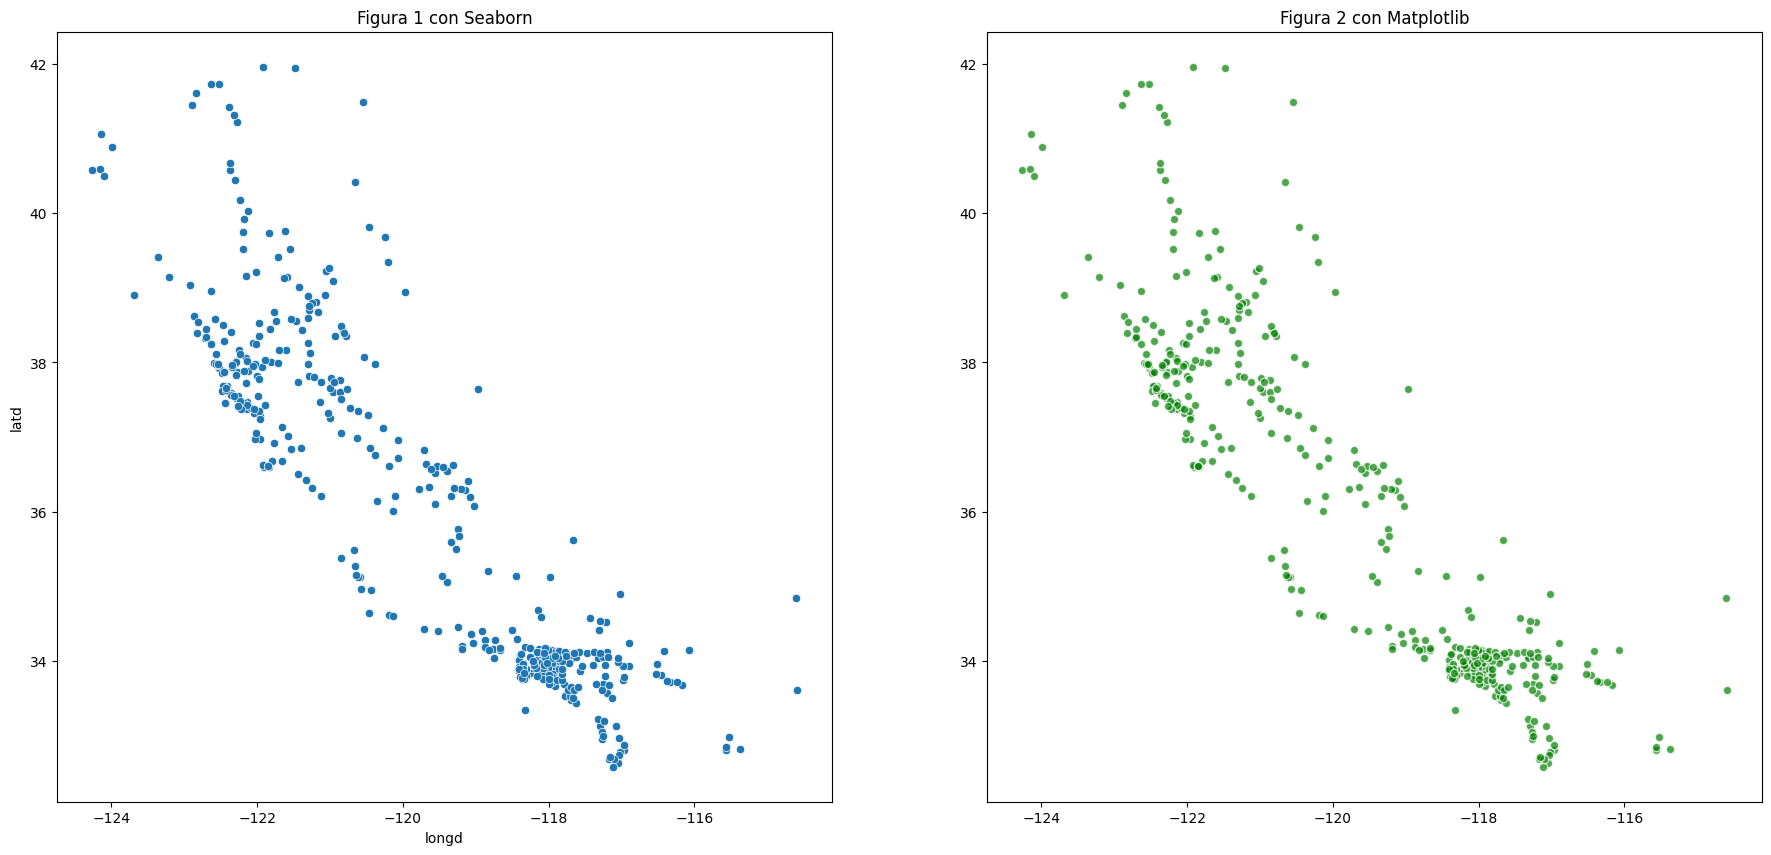

In [4]:
# Ejemplo sintaxis tipo MATLAB
plt.figure(figsize=(22,10))

#primer subplot
plt.subplot(1,2,1)

sns.scatterplot(data= df, # Usamos Seaborn
                x="longd",
                y="latd")

plt.title("Figura 1 con Seaborn")

#segundo subplot
plt.subplot(1,2,2)

plt.scatter(x= df["longd"], # Usamos Matplotlib
            y= df["latd"],
            color= "green",
            alpha= 0.7,
            edgecolors="white")

plt.title("Figura 2 con Matplotlib")

plt.show()

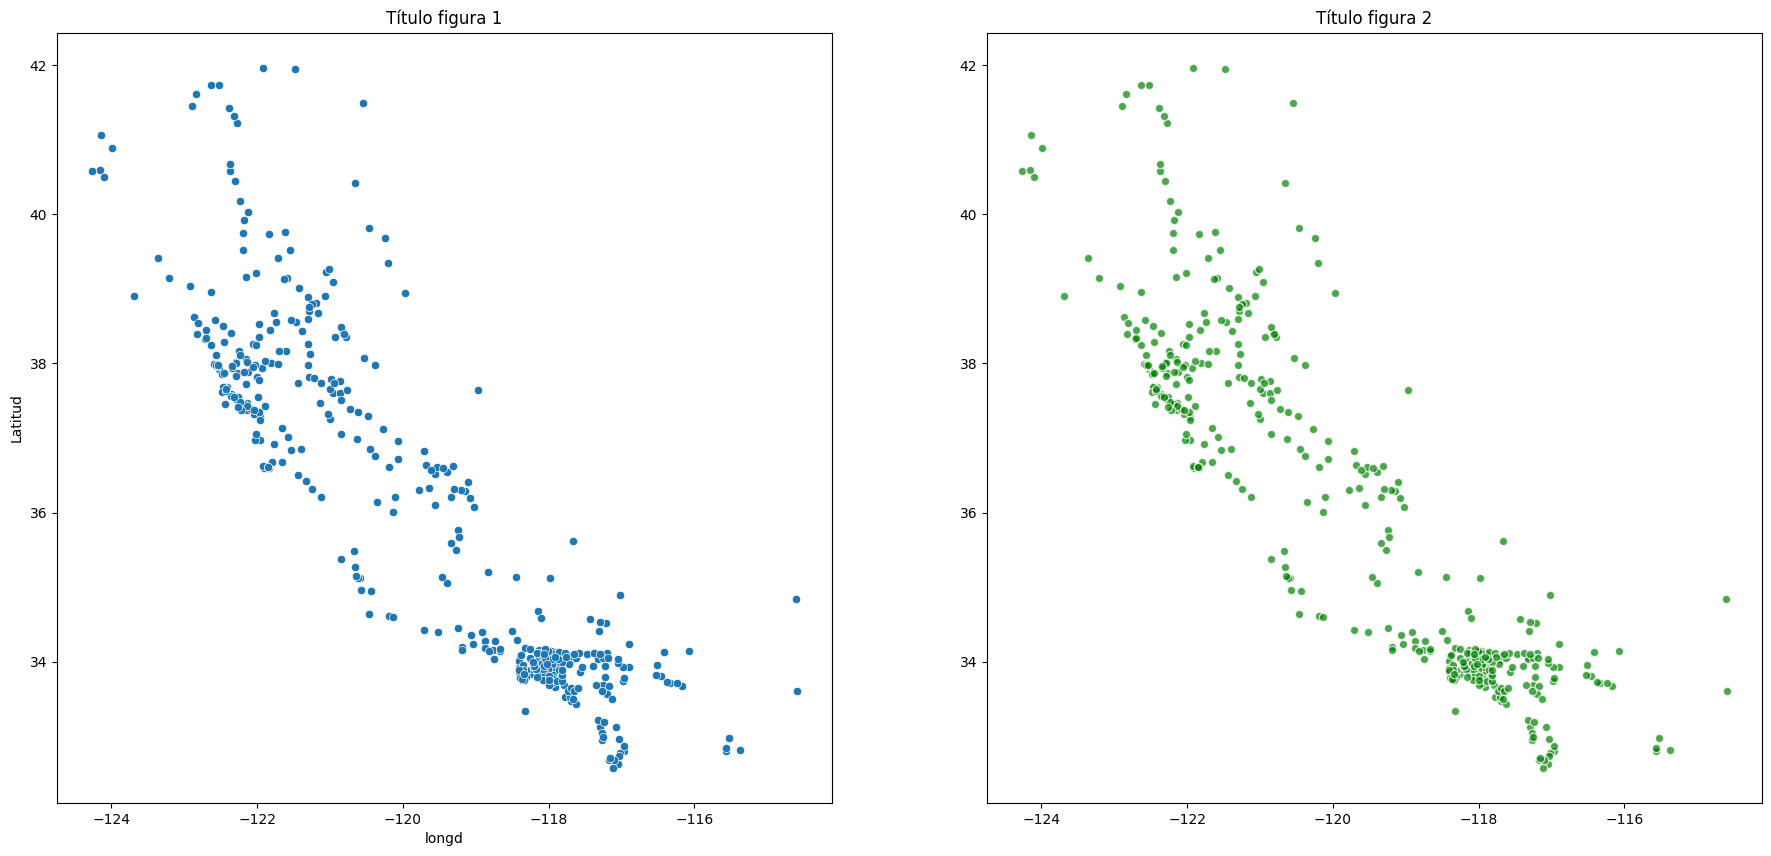

In [5]:
# Ejemplo sintaxis tipo OOP
fig, axs = plt.subplots(1,2, figsize=(22,10))

#primer subplot
primer_ax = axs[0]

sns.scatterplot(data= df, # Usamos Seaborn
                x="longd",
                y="latd",
                ax= primer_ax)

primer_ax.set_title("Título figura 1")
primer_ax.set_ylabel("Latitud")

#segundo subplot
segundo_ax = axs[1]

segundo_ax.scatter(x= df["longd"], # Usamos Matplotlib
                   y= df["latd"],
                   color= "green",
                   alpha= 0.7,
                   edgecolors="white")

segundo_ax.set_title("Título figura 2")

plt.show()

---

### **Solución #1.2**

In [6]:
# Versión original vista en clase

def scatter_with_controls(df, x_col, y_col, color_col= None, size_col = "", scale= 1, legend= True):

    fig, ax = plt.subplots(figsize = (20,10)) # Cuando creas 1 sólo gráfico no hace falta poner 1,1
    
    # Creamos el scatter en función de los argumentos de entrada
    sizes = (20 * scale, 800 * scale)

    if type(size_col) == str:
        if size_col != "": # Si el argumento size es un str consideramos que es una de las columnas del dataframe
            if color_col: # Ahora comprobamos que realmente haya columna de color
                sns.scatterplot(data= df,
                                x= x_col,
                                y= y_col,
                                hue= color_col,
                                size= size_col,
                                palette= "viridis",
                                alpha= 0.5,
                                ax= ax,
                                sizes= sizes,
                                )
                
            else: # No hay columna de color, así que no lo pasamos como argumento y dejamos que lo escoja el método
                sns.scatterplot(data= df,
                                x= x_col,
                                y= y_col,
                                size= size_col,
                                alpha= 0.5,
                                ax= ax,
                                sizes= sizes,
                                )
                
        elif color_col: # Si hay categoria de color y además datos de tamaño que no son una columna
            sns.scatterplot(x= x_col,
                            y= y_col, 
                            data= df, 
                            hue= color_col,
                            alpha=0.5, 
                            palette='viridis', 
                            ax= ax,
                            ) # Ojo no aplicamos la escala
    else:
        sns.scatterplot(x= x_col, 
                        y= y_col, 
                        size= size_col, 
                        data= df, 
                        alpha= 0.5, 
                        palette='viridis', 
                        ax= ax, 
                        # sizes = sizes,
                        ) # Ojo no aplicamos la escala, ni el color
    
    # Labels
    if legend:
        ax.legend(ncol= 2, loc= "upper right", frameon= False, labelspacing= 2)
        
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

    return ax



In [7]:
# Versión mejorada, manejo de argumentos mediante diccionario

def scatter_with_controls(df, x_col, y_col, color_col=None, size_col=None, scale=1, legend=True):
    """
    Crea un diagrama de dispersión con control de color y tamaño.
    
    Parameters:
    -----------
    df : DataFrame
    x_col : str - Columna para eje X
    y_col : str - Columna para eje Y
    color_col : str, optional - Columna categórica para color
    size_col : str, int, float, optional - Columna para tamaño o valor fijo
    scale : float - Factor de escala para los tamaños
    legend : bool - Si True muestra leyenda personalizada
    """
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Preparamos diccionario con argumentos comunes
    plot_kwargs = {
        'data': df,
        'x': x_col,
        'y': y_col,
        'alpha': 0.5,
        'ax': ax
    }
    
    # Manejamos el color
    if color_col:
        plot_kwargs['hue'] = color_col
        plot_kwargs['palette'] = 'viridis'
    
    # Manejamos el tamaño
    if size_col is not None:
        if isinstance(size_col, str):  # Si es una columna
            plot_kwargs['size'] = size_col
            plot_kwargs['sizes'] = (20 * scale, 800 * scale)
        else:  # Si es un valor numérico fijo - creamos serie con ese valor
            plot_kwargs['size'] = pd.Series([size_col] * len(df))
            plot_kwargs['sizes'] = (size_col * scale, size_col * scale)
    
    # Creamos el scatter
    sns.scatterplot(**plot_kwargs)
    
    # Configuración de leyenda
    if legend:
        ax.legend(ncol=2,
                  loc="upper right",
                  frameon=False,
                  labelspacing=2)
    else:
        # Removemos la leyenda si existe
        legend_obj = ax.get_legend()
        if legend_obj:
            legend_obj.remove()
    
    # Labels
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    
    return ax

### #1.3

Pinta el diagrama de dispersión de longitud y latitud (longitud en las x, latitud en las y) de las ciudades, usando el tamaño de las ciudades para el tamaño de los puntos y los colores para mostrar la población. Previamente crea una columna nueva "log_population" y asignale el log decimal de la poblacion (np.log10() y como argumento los valores de la columna "population_total"). Usa "log_population" para el color.

Una vez calculado el logaritmo, también puedes probar a categorizar la población, aquí tienes un ejemplo de como podría salir para que lo tengas de referencia:

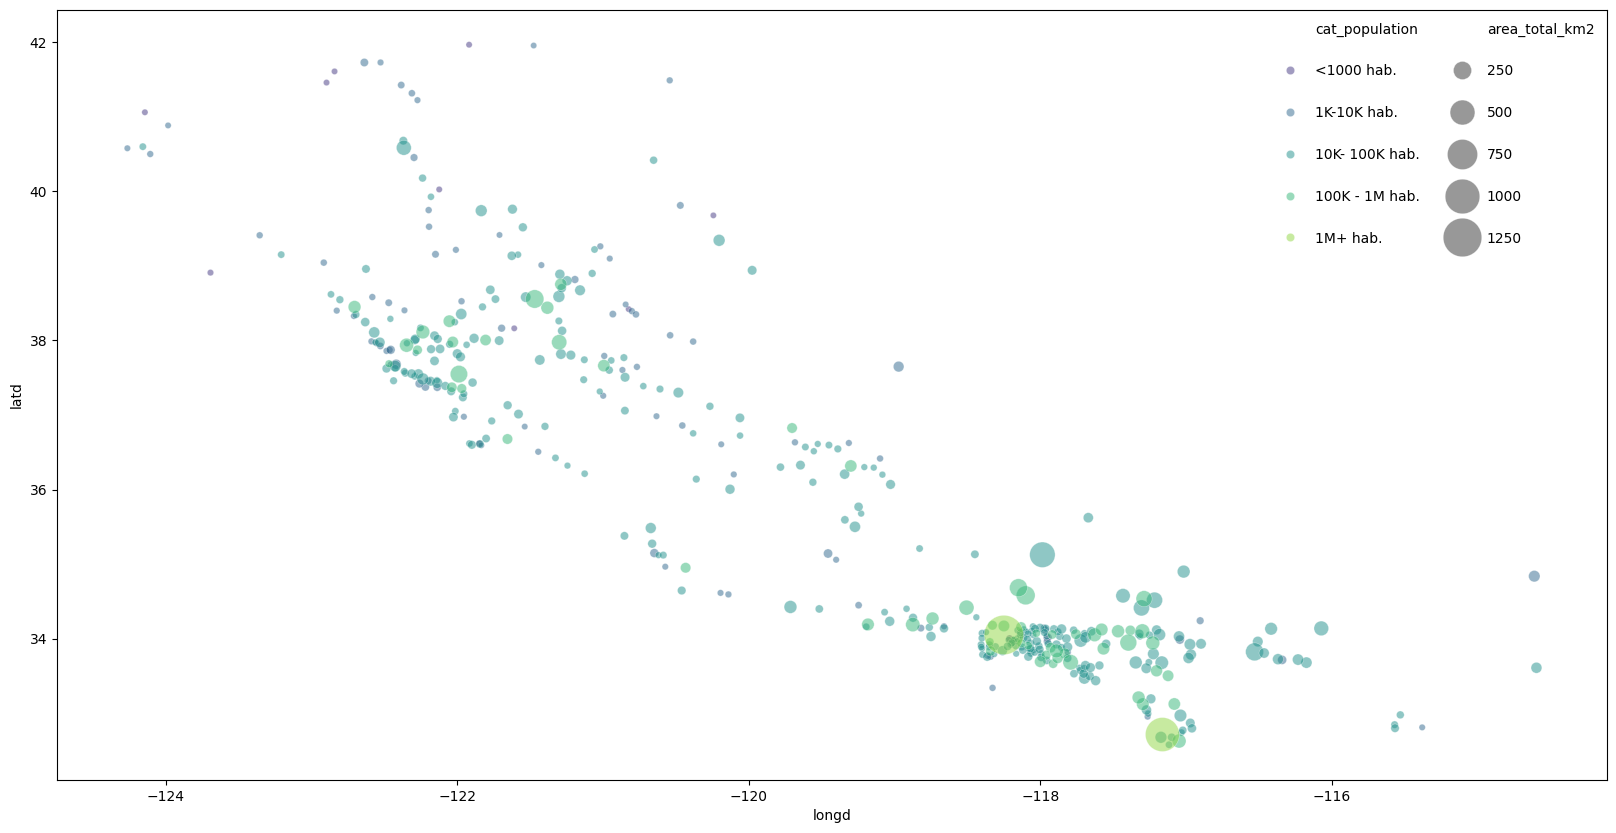

*Una posibilidad muy habitual es convertir las poblaciones a su logaritmo en base 10*

<Axes: xlabel='population_total', ylabel='Count'>

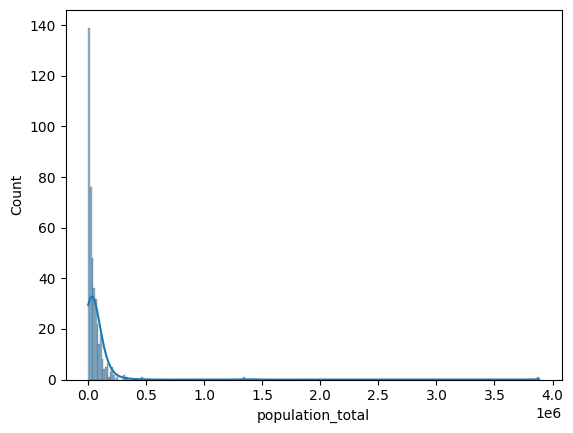

In [8]:
sns.histplot(df["population_total"], kde=True) # distribución log-normal

<Axes: xlabel='population_total', ylabel='Count'>

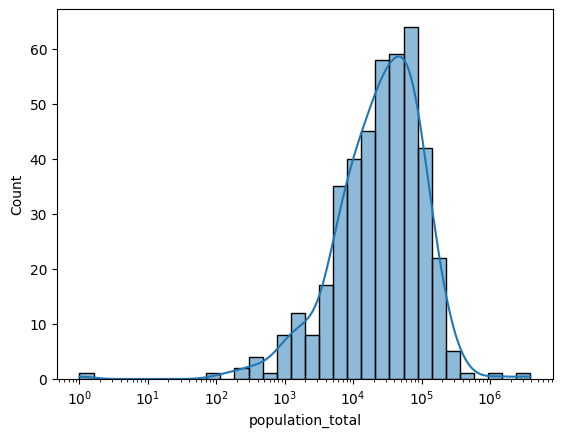

In [9]:
sns.histplot(df["population_total"], kde=True, log_scale=10)

In [10]:
df["log_population"] = np.log10(df["population_total"])

In [11]:
df[["population_total","log_population"]][:5]

population_total  log_population
0             31765        4.501949
1             20330        4.308137
4             83089        4.919544
5             47823        4.679637
6              2827        3.451326

In [12]:
10 ** 4.501949

31765.010263870874

In [13]:
np.power(10, np.log10(df["population_total"][:5]))

0    31765.0
1    20330.0
4    83089.0
5    47823.0
6     2827.0
Name: population_total, dtype: float64

In [14]:
df[["population_total","log_population"]]

population_total  log_population
0               31765        4.501949
1               20330        4.308137
4               83089        4.919544
5               47823        4.679637
6                2827        3.451326
..                ...             ...
477              2933        3.467312
478              7765        3.890141
479             64925        4.812412
480             51367        4.710684
481             20700        4.315970

[427 rows x 2 columns]

*Viendo el histograma se observa una ciudad de menos de 10 habitantes*

In [15]:
df[df.population_total < 10]

city       latd       longd  elevation_m  elevation_ft  \
327  Pomona  34.060833 -117.755833        259.0         850.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
327                 1            22.964           22.952             0.012   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  \
327          59.474         59.444            0.03                0.05   

     log_population  
327             0.0

*Parece claramente un error, así que lo miramos en Internet, Pomona -> 149058 habitantes y lo corregimos, de hecho cualquier valor por debajo de 3 debería resultar sospechoso, "ciudades" de menos de 1000 habitantes?*

In [16]:
df.loc[df.city == "Pomona", "population_total"] = 149058

df["log_population"] = np.log10(df["population_total"])

In [17]:
df[df.population_total < 1000]

city       latd       longd  elevation_m  elevation_ft  \
7    AmadorCity  38.419444 -120.824167        280.0         919.0   
114      Dorris  41.965000 -121.918889       1294.0        4245.0   
132        Etna  41.457222 -122.896944        895.0        2936.0   
144   FortJones  41.607222 -122.841944        842.0        2762.0   
190    Industry  34.016667 -117.950000         98.0         322.0   
195     Isleton  38.161944 -121.609167          3.0          10.0   
242    Loyalton  39.676667 -120.243056       1509.0        4951.0   
326  PointArena  38.908889 -123.693056         36.0         118.0   
366    SandCity  36.617222 -121.848333         22.0          72.0   
428      Tehama  40.024444 -122.123889         64.0         210.0   
435    Trinidad  41.059167 -124.143056         53.0         174.0   
448      Vernon  34.001111 -118.211111         62.0         203.0   

     population_total  area_total_sq_mi  area_land_sq_mi  area_water_sq_mi  \
7                 185             0.314            0.314             0.000   
114               939             0.718            0.702             0.016   
132               737             0.759            0.758             0.001   
144               839             0.602            0.602             0.000   
190               219            12.064           11.785             0.279   
195               804             0.492            0.440             0.052   
242               769             0.355            0.355             0.000   
326               449             1.350            1.350             0.000   
366               334             2.924            0.562             2.362   
428               418             0.794            0.794             0.000   
435               367             0.671            0.485             0.186   
448               112             5.157            4.973             0.184   

     area_total_km2  area_land_km2  area_water_km2  area_water_percent  \
7             0.813          0.813           0.000                0.00   
114           1.860          1.819           0.041                2.19   
132           1.965          1.962           0.002                0.12   
144           1.560          1.560           0.000                0.00   
190          31.245         30.522           0.723                2.31   
195           1.272          1.139           0.134               10.50   
242           0.921          0.921           0.000                0.00   
326           3.496          3.496           0.000                0.00   
366           7.575          1.457           6.119               80.77   
428           2.057          2.057           0.000                0.00   
435           1.737          1.255           0.482               27.75   
448          13.357         12.880           0.476                3.57   

     log_population  
7          2.267172  
114        2.972666  
132        2.867467  
144        2.923762  
190        2.340444  
195        2.905256  
242        2.885926  
326        2.652246  
366        2.523746  
428        2.621176  
435        2.564666  
448        2.049218

*Haciendo algunas comprobaciones aleatorías en Internet vemos que sí que existen, nos las quedamos*

*El gráfico con las ciudades/poblaciones de California quedaría así*

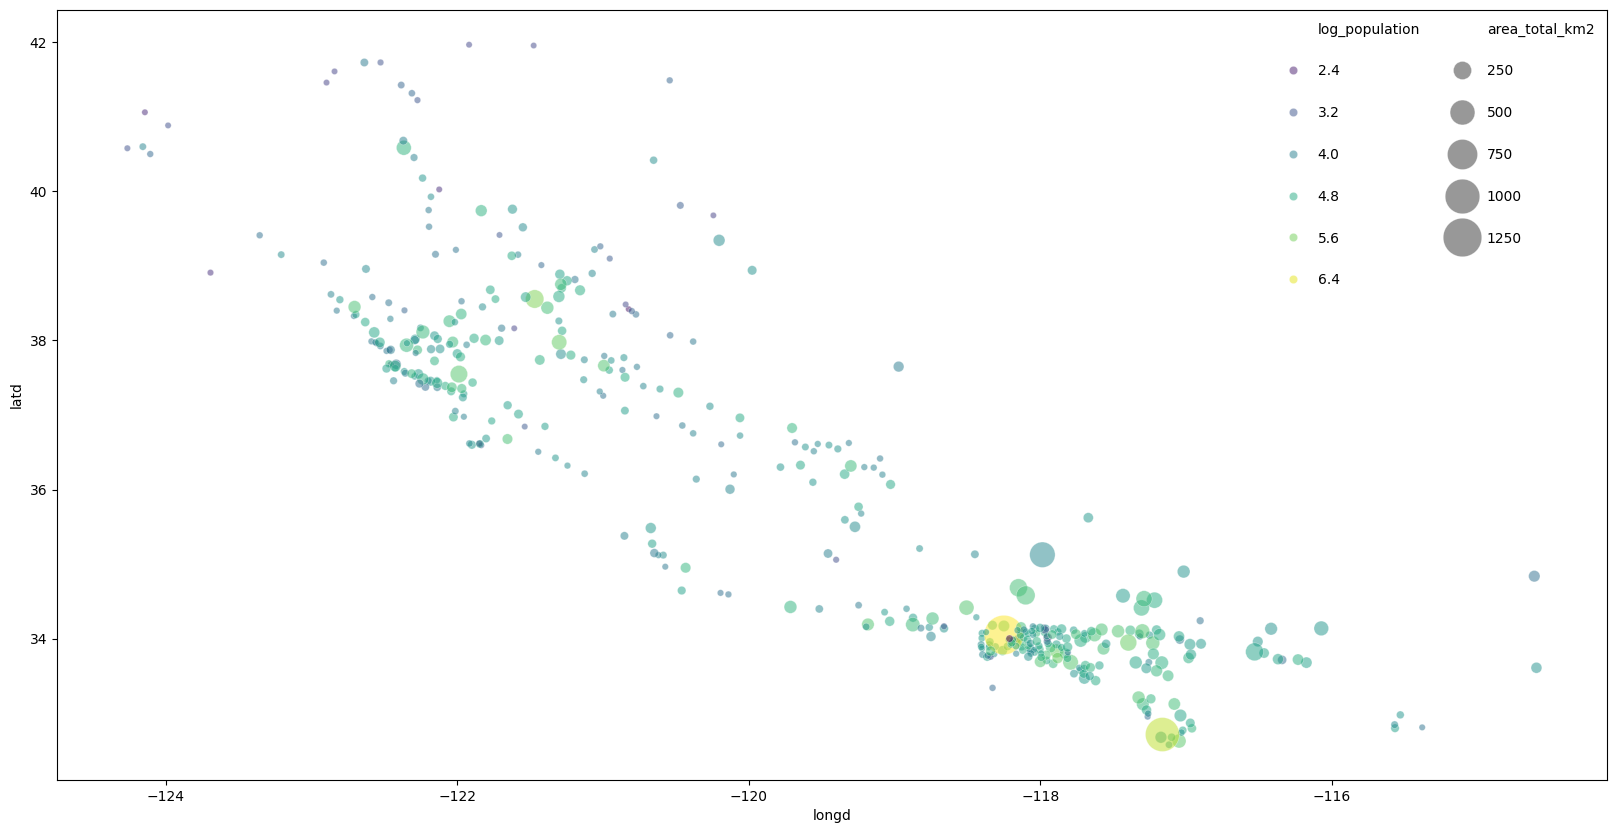

In [18]:
scatter_with_controls(df,
                      "longd",
                      "latd",
                      color_col = "log_population",
                      size_col = "area_total_km2",
                      scale = 1)
plt.show()

*En estos casos puede ser muy interesante aprovechar el logaritmo para generar una categorización de la población de la siguiente manera:*

In [19]:
df["cat_population"] = "<1000 hab."
df.loc[df.log_population > 3, "cat_population"] = "1K-10K hab."
df.loc[df.log_population > 4, "cat_population"] = "10K- 100K hab."
df.loc[df.log_population > 5, "cat_population"] = "100K - 1M hab."
df.loc[df.log_population > 6, "cat_population"] = "1M+ hab."

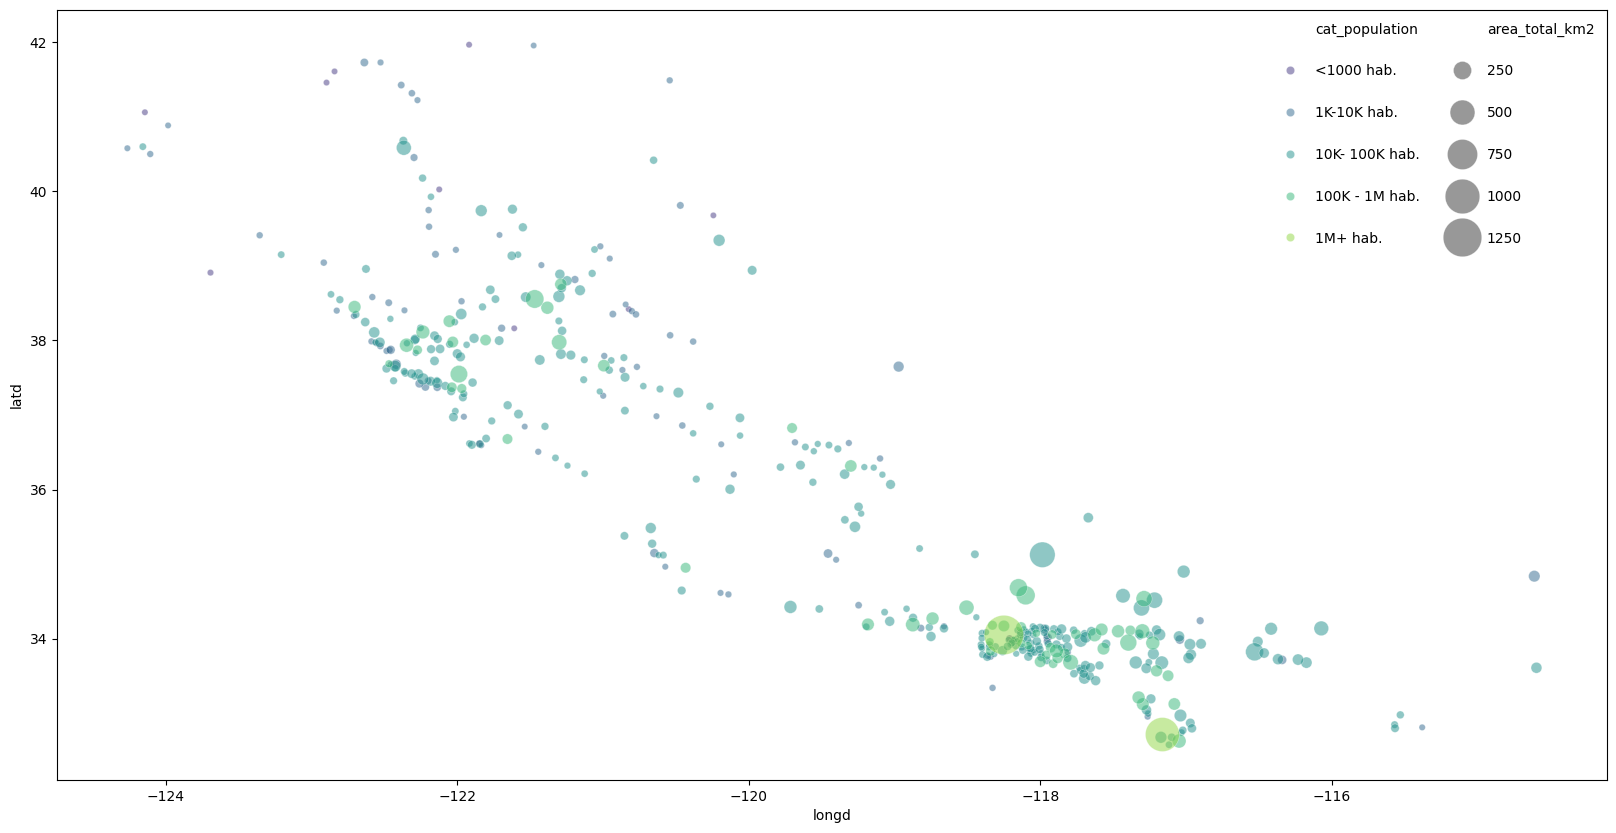

In [20]:
scatter_with_controls(df.sort_values("log_population"),
                      "longd",
                      "latd",
                      color_col = "cat_population",
                      size_col = "area_total_km2",
                      scale = 1)
plt.show()

*Fíjate en como la leyenda ahora queda mucho más limpia. Además llegados a este punto a lo mejor tiene sentido utilizar una paleta para valores categóricos en lugar de una paleta continua. Prueba a hacer cambios en el código :)*

### Extra: Función con colorbar

In [21]:
def scatter_with_colorbar(df, x_col, y_col, color_col=None, size_col=None, scale=1, legend=True, colorbar=False):
    """
    Crea un diagrama de dispersión con control de color y tamaño.
    
    Parameters:
    -----------
    df : DataFrame
    x_col : str - Columna para eje X
    y_col : str - Columna para eje Y
    color_col : str, optional - Columna categórica/numérica para color
    size_col : str, int, float, optional - Columna para tamaño o valor fijo
    scale : float - Factor de escala para los tamaños
    legend : bool - Si True muestra leyenda para tamaños (y colores si no hay colorbar)
    colorbar : bool - Si True muestra colorbar para color (solo si color_col es numérica)
    """
    
    fig, ax = plt.subplots(figsize=(20, 10))
    
    # Preparamos diccionario con argumentos comunes
    plot_kwargs = {
        'data': df,
        'x': x_col,
        'y': y_col,
        'alpha': 0.5,
        'ax': ax
    }
    
    # Manejamos el color
    if color_col:
        plot_kwargs['hue'] = color_col
        plot_kwargs['palette'] = 'viridis'
    
    # Manejamos el tamaño
    if size_col is not None:
        if isinstance(size_col, str):  # Si es una columna
            plot_kwargs['size'] = size_col
            plot_kwargs['sizes'] = (50 * scale, 800 * scale)
        else:  # Si es un valor numérico fijo - creamos serie con ese valor
            plot_kwargs['size'] = pd.Series([size_col] * len(df))
            plot_kwargs['sizes'] = (size_col * scale, size_col * scale)
    
    # Creamos el scatter
    sns.scatterplot(**plot_kwargs)
    
    # Manejo del colorbar para color
    if color_col and colorbar and pd.api.types.is_numeric_dtype(df[color_col]):
        # Crear colorbar
        sm = plt.cm.ScalarMappable(
            cmap='viridis', 
            norm=plt.Normalize(
                vmin=df[color_col].min(), 
                vmax=df[color_col].max()
            )
        )
        sm.set_array([])
        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label(color_col)
        
        # Manejar leyenda de tamaños
        if legend and size_col and isinstance(size_col, str):
            # Filtrar leyenda para mantener solo tamaños
            handles, labels = ax.get_legend_handles_labels()
            size_start_idx = None
            for i, label in enumerate(labels):
                if label == size_col:
                    size_start_idx = i
                    break
            
            if size_start_idx is not None:
                ax.legend(handles[size_start_idx:],
                          labels[size_start_idx:],
                          loc="upper right",
                          frameon=False,
                          labelspacing=2)
            else:
                # Si no encontramos la sección de tamaño, quitar leyenda
                legend_obj = ax.get_legend()
                if legend_obj:
                    legend_obj.remove()
        else:
            # Si no queremos leyenda o no hay tamaño variable, quitar leyenda
            legend_obj = ax.get_legend()
            if legend_obj:
                legend_obj.remove()
    
    elif legend:
        # Configuración normal de leyenda (sin colorbar)
        ax.legend(ncol=2,
                  loc="upper right",
                  frameon=False,
                  labelspacing=2)
    else:
        # No queremos leyenda, quitarla si existe
        legend_obj = ax.get_legend()
        if legend_obj:
            legend_obj.remove()
    
    # Labels
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    
    return ax

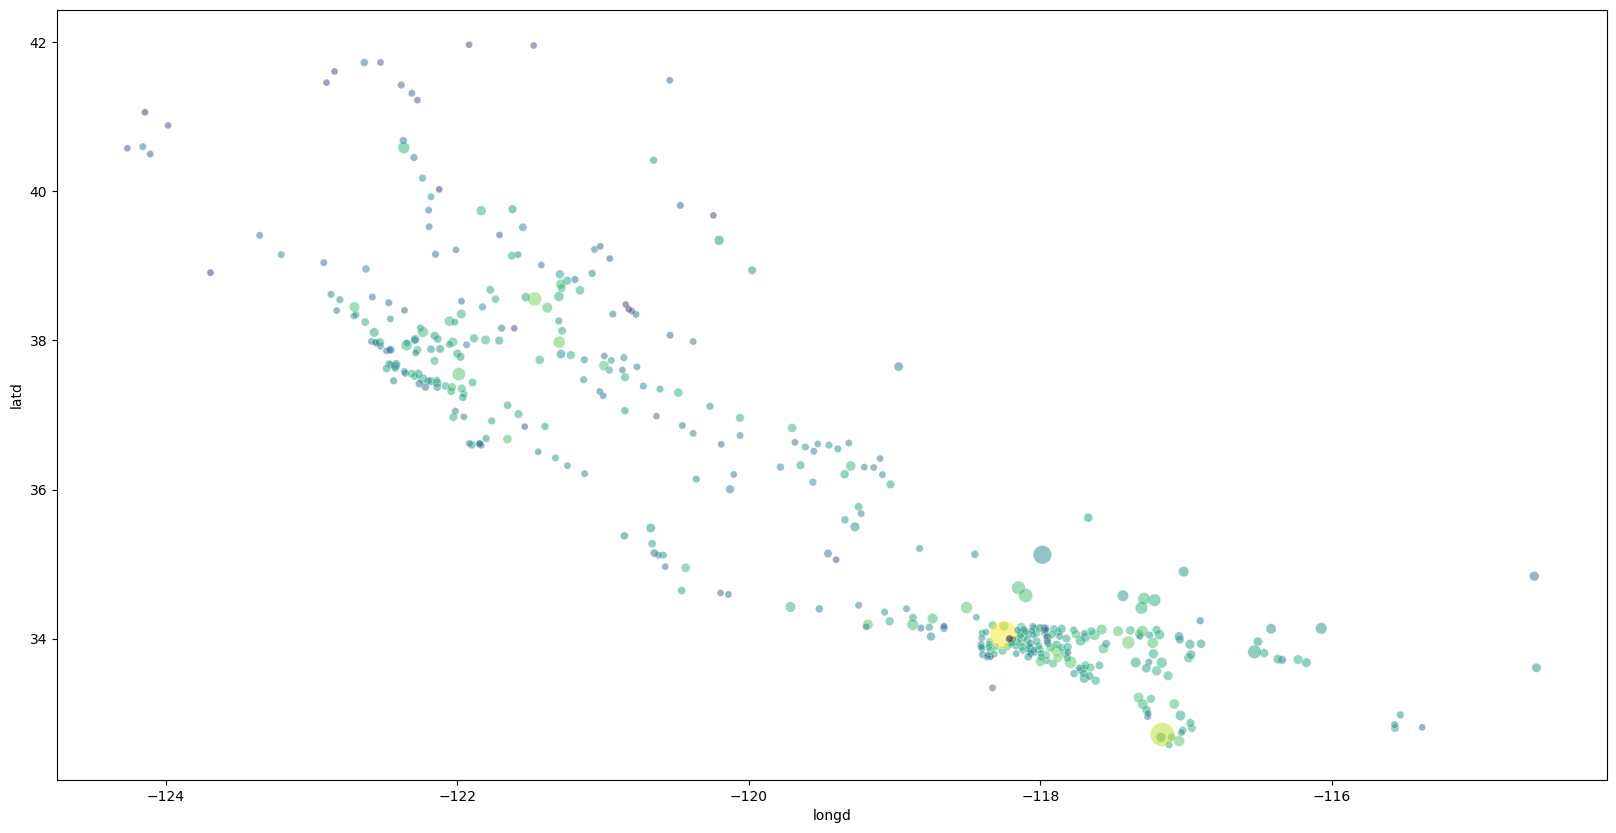

In [22]:
# SIN leyenda y SIN colorbar
scatter_with_colorbar(df, 
                      "longd",
                      "latd", 
                      color_col= "log_population", 
                      size_col= "area_total_km2", 
                      scale= 1/2, 
                      legend= False,
                      colorbar= False)
plt.show()

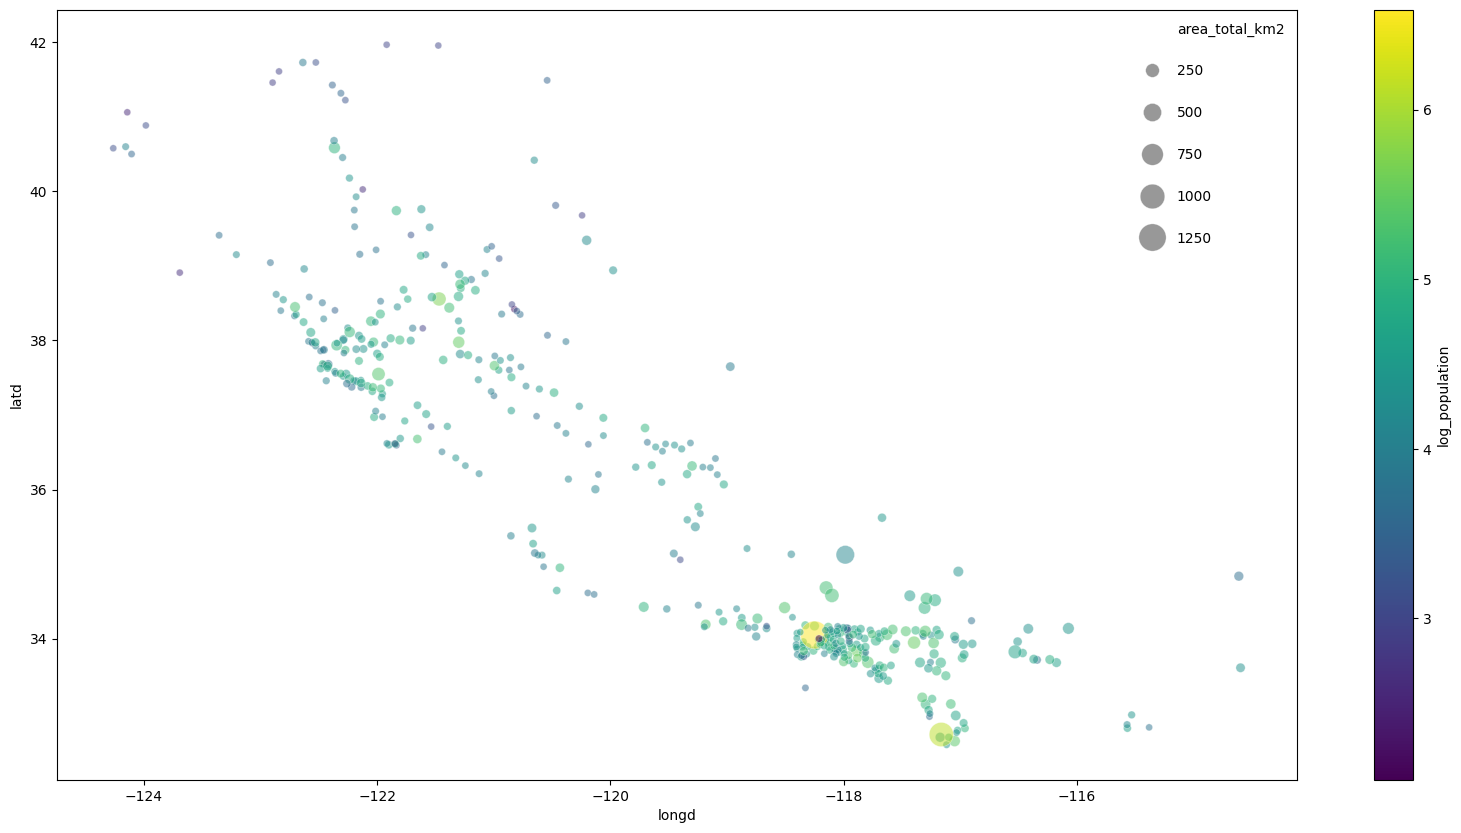

In [23]:
# CON leyenda y CON colorbar
scatter_with_colorbar(df, 
                      "longd",
                      "latd", 
                      color_col = "log_population",
                      size_col = "area_total_km2", 
                      scale = 1/2,
                      legend= True,
                      colorbar= True)
plt.show()

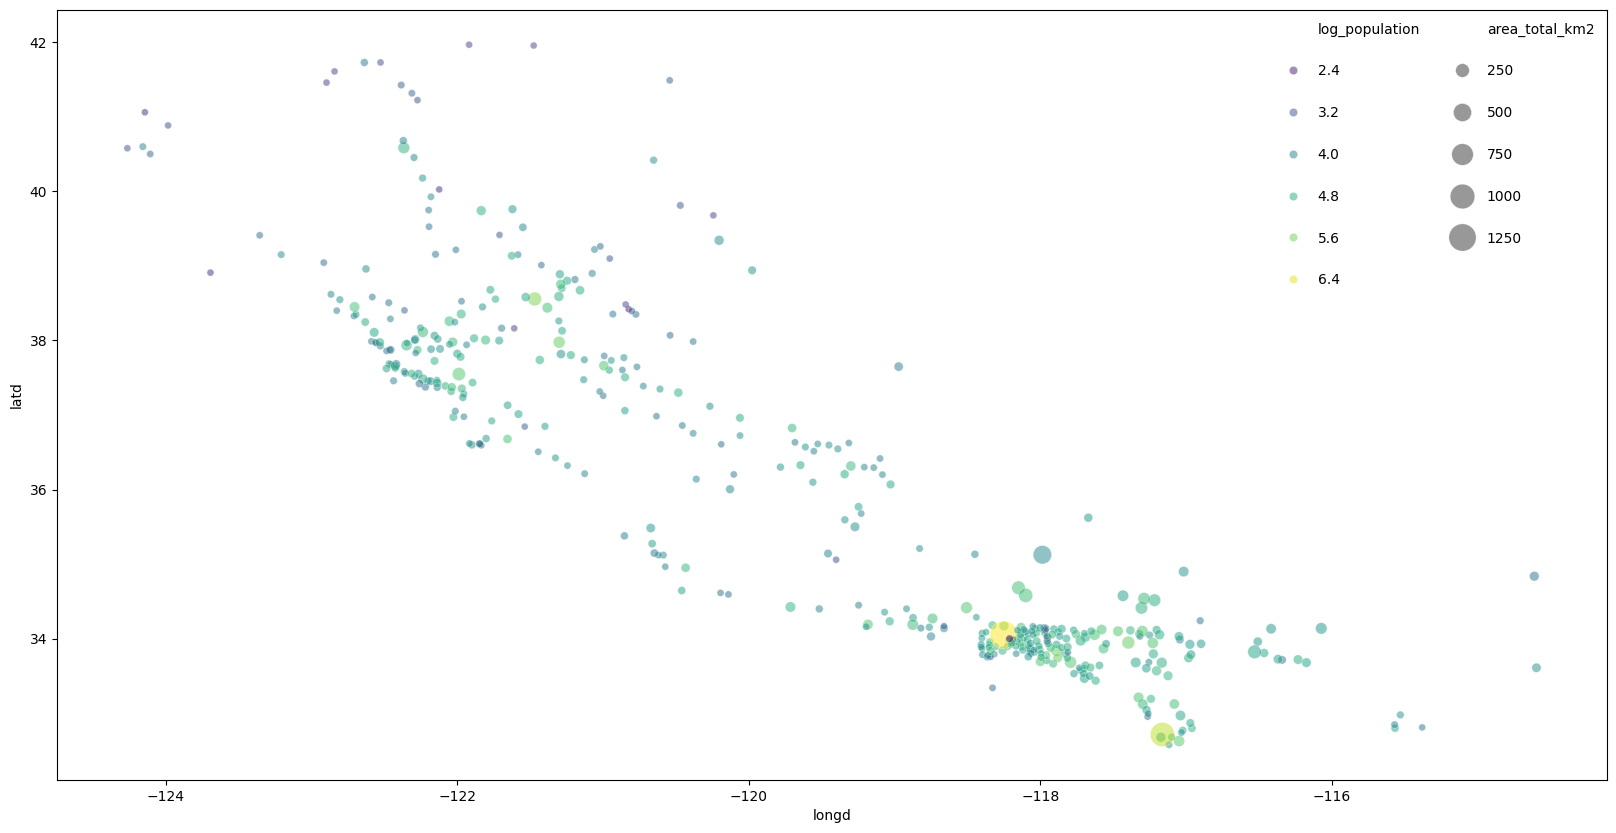

In [24]:
# CON leyenda y SIN colorbar
scatter_with_colorbar(df, 
                      "longd",
                      "latd", 
                      color_col= "log_population",
                      size_col= "area_total_km2", 
                      scale= 1/2,
                      legend= True,
                      colorbar= False)
plt.show()

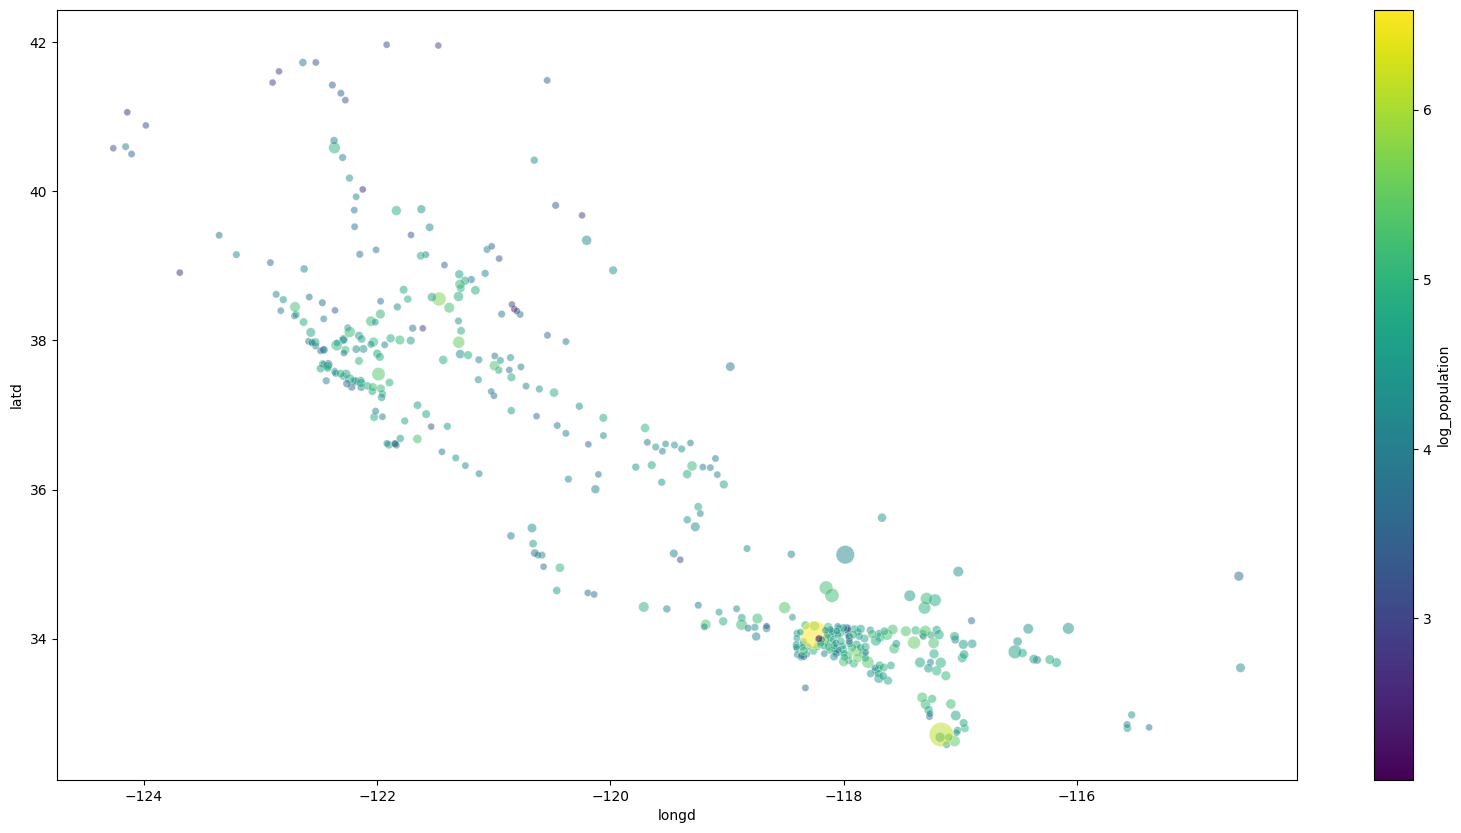

In [25]:
# SIN leyenda y CON colorbar
scatter_with_colorbar(df, 
                      "longd",
                      "latd", 
                      color_col = "log_population",
                      size_col = "area_total_km2", 
                      scale = 1/2,
                      legend= False,
                      colorbar= True)
plt.show()

## #2: Presentación

En esta parte tendrás que hacer dos cosas, crear una presentación sobre el titanic de no más de 6 slides, sin incluir portada, con los siguientes mensajes y su apoyo en datos:  

1- El titanic fue un accidente con una tasa de mortalidad alta.  
2- En esa ocasión los datos apoyan que el mensaje de "mujeres y niños primero".  
3- Pero parece que la clase en la que se viajes tuvo una influencia significativa.  
4- Esto podría explicar las diferencias de tasas de supervivencia entre mujeres y niños.    
5- Además, aunque el puerto de embarque parece influir, se podría asumir que depende de la clase de pasaje que embarcó en cada uno.  

Y generar el notebook con las gráficas que vas a emplear en la presentación. Tienes que entregar ambas cosas.

*Los primeros pasos podrían ser: [Adaptalos siempre a tu estilo]*  

1. ***Objetivo**: Presentación para una práctica obligatoria, aquí mi objetivo más claro entonces sería ser eficiente, no dedicar demasiado tiempo y cumplir con la letra de la petición y además tener en cuenta que es informativa y de acción: Informativa -> Tiene que quedar claro que la he hecho siguiendo las instrucciones, Acción: Que puntúen bien. Como quiero ser eficiente mi objetivo se va a centrar en ser informativo y en el menor tiempo posible.  
EN MI CASO: El objetivo es hacer una presentación que ilustre los principios que he contado o lo contrario para que se vea que no es bueno.*  

2. ***Público**: Quien corrije la presentación, es decir, que puedo suponer que el equipo docente del bootcamp. Es decir que seguiré las instrucciones -> Ceñirme a los mensajes, sólo datos relevantes, nada de gráficas complejas... Ojo, igual para otro público objetivo hubiera cambiado las guías de estilo.  
EN MI CASO: El público es cada uno de mis alumnos, así que utilizaré ante la variedad la aproximación más directa y sencilla ya que son muchos posibles estilos.*  

3. ***Estilo**: No florear en general, ir al grano, Guías: Las que me dieron, mensaje en la cabecera o a la izquierda dato a la derecha y que no distraiga.  
EN MI CASO: Es fácil es la que me gusta :-)* 

#### Portada

Aquí nos permitimos el lujo de la Generativa, pero sólo por enseñarlo ya que es muy fácil crear infografías e ilustraciones con Gemini, ChatGPT, etc. Podéis usar un prompt similar al siguiente e ir iterando:


PROMPT: Necesito una portada para una presentación sobre un EDA del hundimieto del Titanic que refleje el tema (el Titanic), el contexto (un análisis de datos exploratorio) y alguna de las conclusiones principales: mujeres y niños primero, primera clase también

OPCION 1:

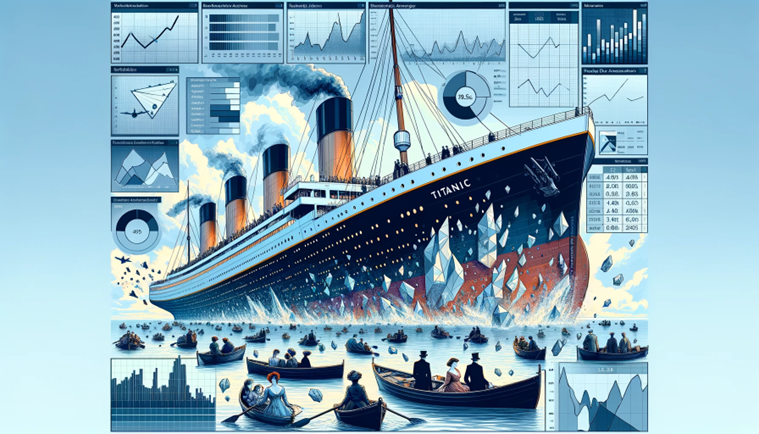

OPCION 2:

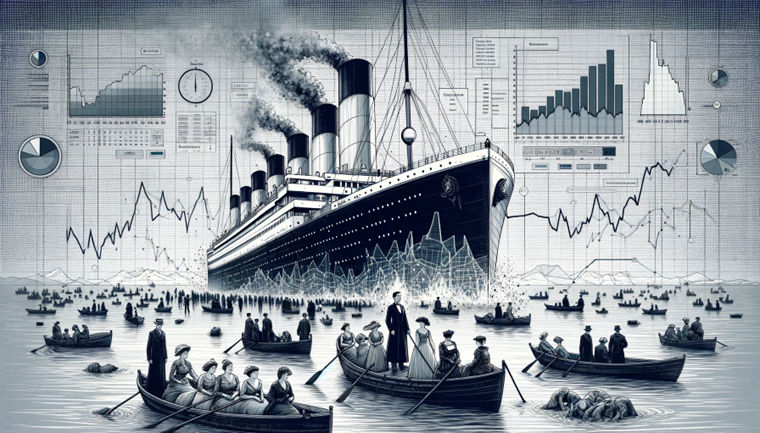

*Nos quedamos con la opción 2*


#### Título: 

***"Una Historia de Sacrificio y Reflexión"*** [Porque somos melodramáticos]

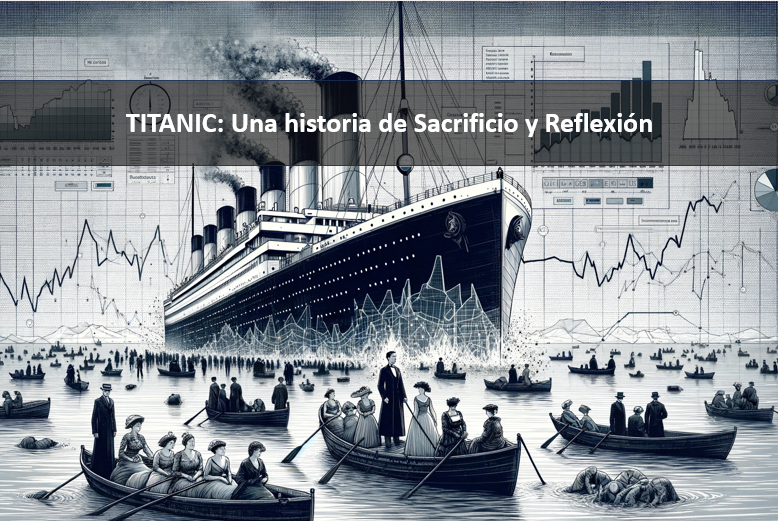

#### Slide 1

*En este caso concreto y dadas las circunstancias nos permitimos empezar por las conclusiones, pero vosotros siempre deberías empezar por el contexto y objetivos del análisis (incluso una segunda slide con material y métodos).*

*Notese el tóno "dramático" de nuestra diapositiva, si quisieramos algo más frío habríamos puesto más datos y el mensaje de la izquierda habría sido más corto y sin negritas.*

*El detalle gráfico del pie a la derecha depende de gustos, es un recurso como cualquier otro para darle coherencia a la presentación.*

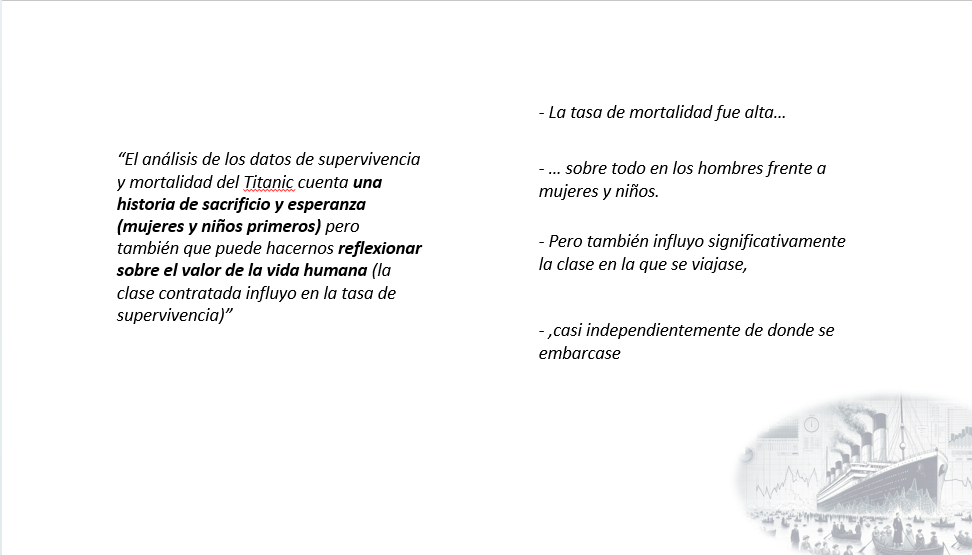

#### Mensajes y resto de Slides

1- Tasa de Mortalidad Alta convertido en supervivencia, para que el mensaje sea menos negativo

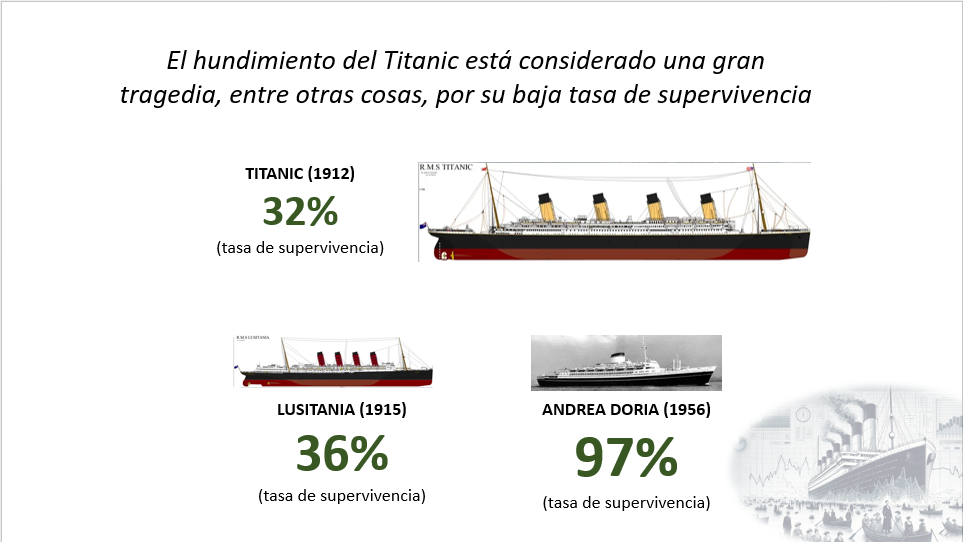

*Aquí hemos jugado con el tamaño de los números en una clara manipulación, que no siempre es recomendable, pero suele hacer destacar el número en función de que lo que queramos transmitir.*

*Y más que destacar lo "manipulador" de la slide, es buscar cómo presentar un dato de una sóla variable sin que quede soso y poco informativo, por eso hemos buscado compararlo con dos accidentes similares para ofrecer un marco de referencia.*

2- El meollo: 

En esa ocasión los datos apoyan que el mensaje de "mujeres y niños primero".  


*Aquí ya nos fijamos en un solo ratio, no es estrictamente necesario comparar los dos ratios entre los tres grupos porque tienen información complementaria que no aporta y recarga la visualización. El detalle estético es innecesario para los datos, pero lo usamos para mantener el tono y el contexto del estudio.*

In [26]:
df_titanic = pd.read_csv("./data/titanic.csv")

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"]).T
tabla_contingencia["freq_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia


alive   no  yes  freq_yes
who                      
child   34   49      59.0
man    449   88      16.4
woman   66  205      75.6

In [27]:
tabla_contingencia.sort_values("freq_yes").index

Index(['man', 'child', 'woman'], dtype='object', name='who')

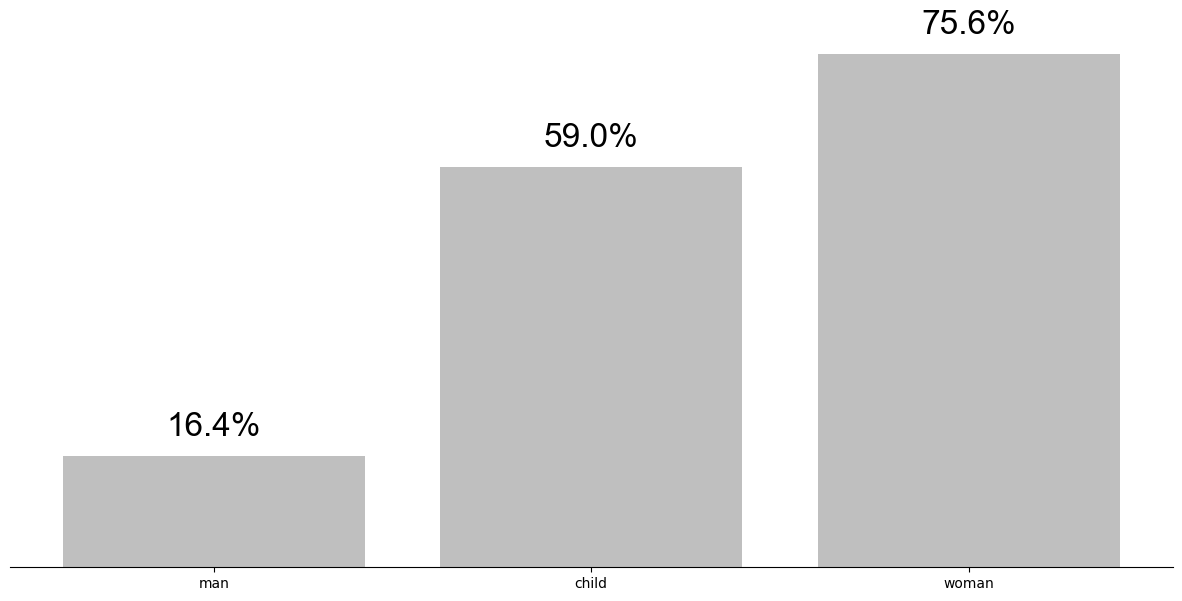

In [28]:
fig, ax = plt.subplots(figsize = (15,7))
ax.bar(tabla_contingencia.sort_values("freq_yes").index.to_list(),
       height = tabla_contingencia.sort_values("freq_yes").freq_yes.to_list(),
       color = "gray",
       alpha = 0.5)

ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["man","child","woman"]:
    valor = tabla_contingencia.loc[categoria, "freq_yes"]
    ax.text(categoria,
            valor+ 3,
            f"{round(valor,2)}%", 
            ha = "center", 
            fontdict = dict(family= "Arial", size = 24))

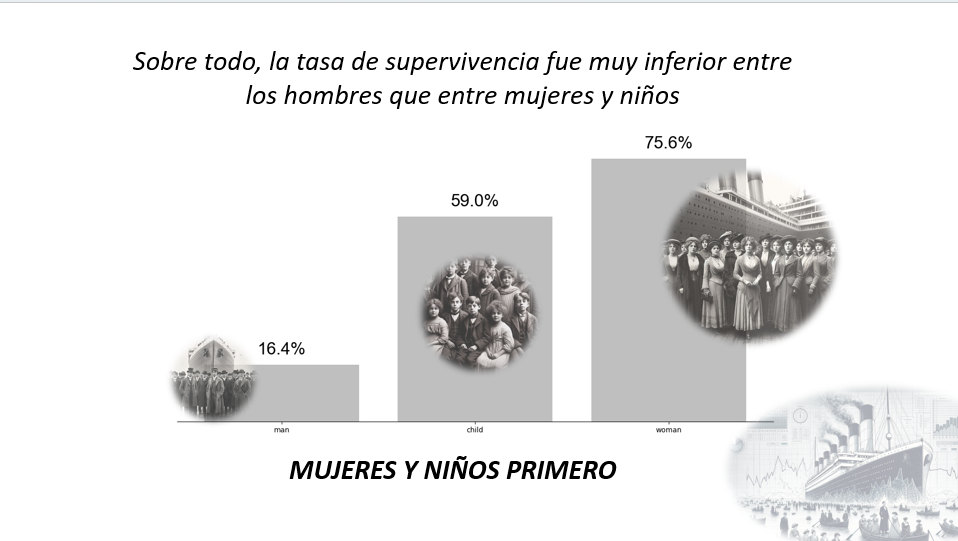

*Os dejamos esta [referencia](https://www.independent.co.uk/news/world/world-history/women-and-children-first-it-s-every-man-for-himself-on-a-sinking-ship-7987975.html), porque al parecer el Titanic es un caso excepcional en el que se cumplió esta premisa, más por la asertividad del capitán y la obediencia de su tripulación que por otra cosa.*

#### 3- Las clases y la reflexión

Pero parece que la clase en la que se viajes tuvo una influencia significativa.

*Solo empleo el ratio en los hombres, y añadiría esta misma gráfica para el resto de grupos al anexo por si alguien preguntase... De esta forma me evito sobrecargar la slide pero llevo preparada la respuesta para una posible pregunta [OJO: El anexo no se incluye en la solución, ni se pide]*

In [29]:
df_man = df_titanic.loc[df_titanic.who == "man"]

tabla_contingencia = pd.crosstab(df_man["alive"],df_man["class"]).T
tabla_contingencia["freq_yes"] = (tabla_contingencia["yes"]/(tabla_contingencia["yes"] + tabla_contingencia["no"])).round(3) * 100
tabla_contingencia


alive    no  yes  freq_yes
class                     
First    77   42      35.3
Second   91    8       8.1
Third   281   38      11.9

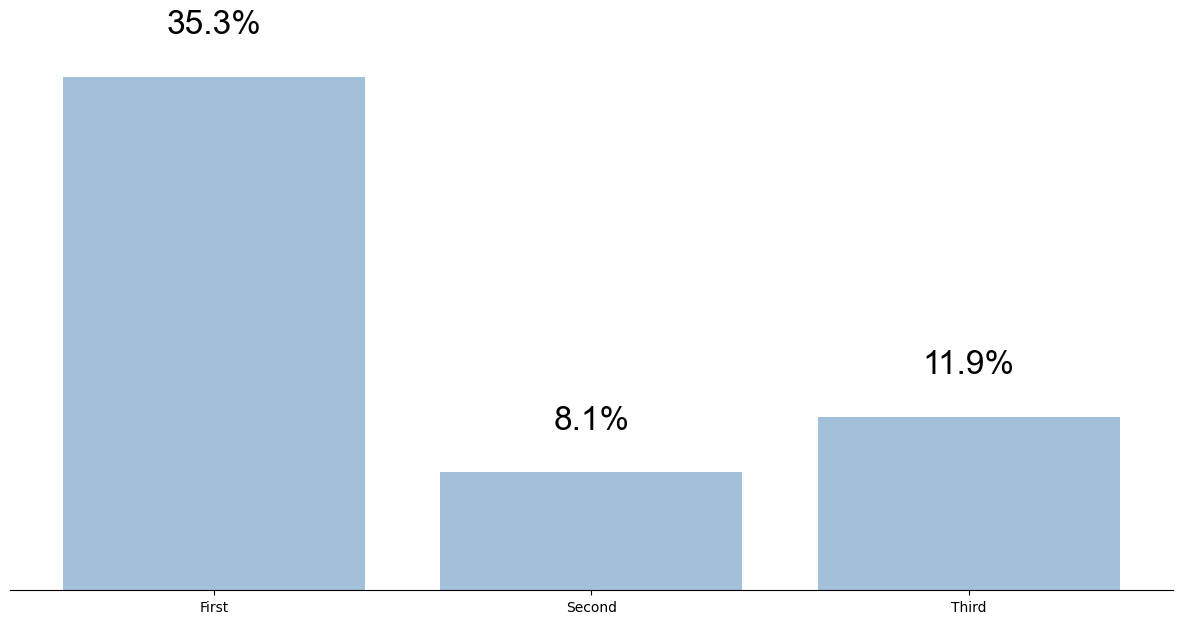

In [30]:
fig, ax = plt.subplots(figsize = (15,7))
ax.bar(tabla_contingencia.index.to_list(),
       height = tabla_contingencia.freq_yes.to_list(),
       color = "steelblue",
       alpha = 0.5)

ax.yaxis.set_visible(False)
for spine in ["left","right","top"]:
     ax.spines[spine].set_visible(False)

for categoria in ["First","Second","Third"]:
    valor = tabla_contingencia.loc[categoria, "freq_yes"]
    ax.text(categoria,
            valor+ 3,
            f"{round(valor,2)}%",
            ha = "center",
            fontdict = dict(family= "Arial", size = 24))

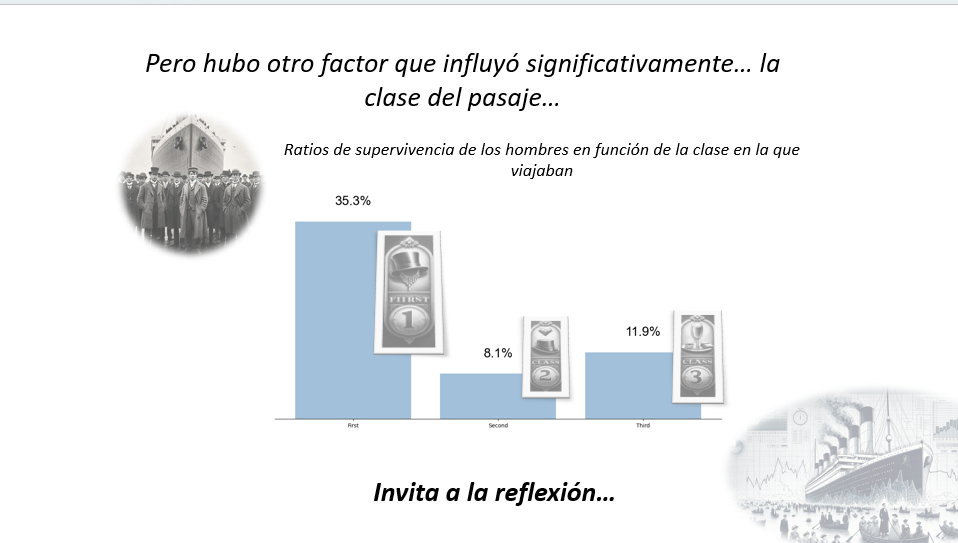

4- Esto podría explicar las diferencias de tasas de supervivencia entre mujeres y niños.  

*Esta es quizás la más difícil de "simplificar" ya que hay que traer porcentajes de varias gráficas. No estamos muy convencidos de ella, con tiempo la repasariamos hasta intentar dejarla más sencilla*

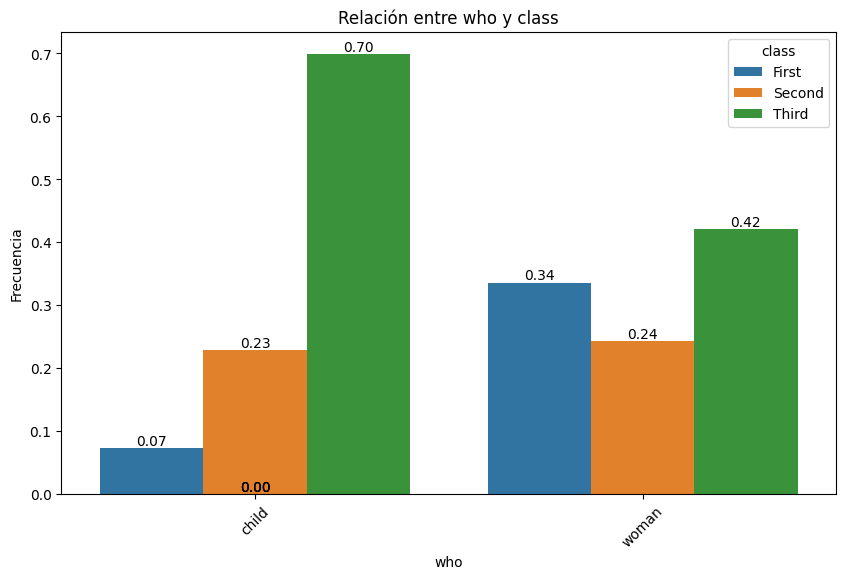

In [31]:
df_cw = df_titanic.loc[df_titanic.who.isin(["child","woman"])]

from bootcampviztools import plot_categorical_relationship_fin

plot_categorical_relationship_fin(df_cw, "who","class", relative_freq = True, show_values = True)

*Hemos retocado la gráfica a mano para no tener que tocar la función:*

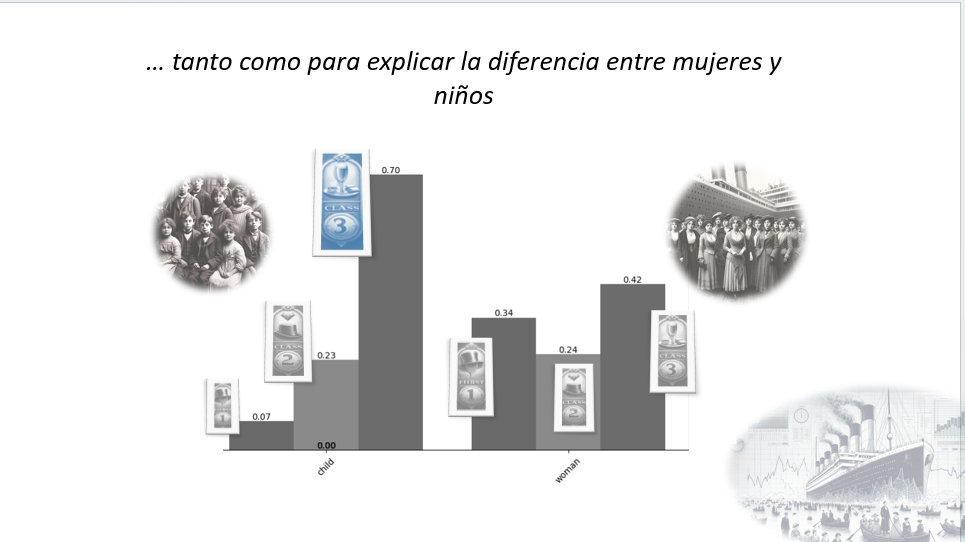

5- Además, aunque el puerto de embarque parece influir, se podría asumir que depende de la clase de pasaje que embarcó en cada uno.    

*Para poder explicar este mensaje lo partimos en dos diapositivas, primero la posible influencia del puerto de embarque y luego la explicación por los dos factores anteriores.*

In [32]:
for puerto in df_titanic.dropna().embark_town.unique():
    df_puerto = df_titanic.loc[df_titanic.embark_town == puerto]
    tasa = ((df_puerto.alive.value_counts(normalize = True)*100).round(2))["yes"]
    print(puerto,f"{tasa}%")

Cherbourg 55.36%
Southampton 33.7%
Queenstown 38.96%


*Nos queda algo así la primera slide de esta pareja:*

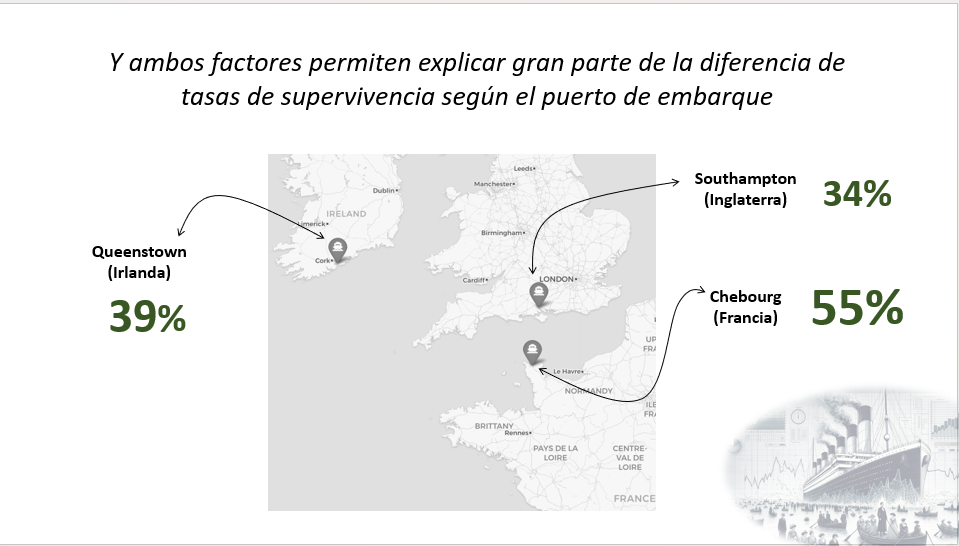

*Y la segunda:*

In [33]:
df_titanic.groupby("embark_town")["who"].value_counts(normalize = True)

embark_town  who  
Cherbourg    man      0.535714
             woman    0.357143
             child    0.107143
Queenstown   man      0.480519
             woman    0.454545
             child    0.064935
Southampton  man      0.636646
             woman    0.270186
             child    0.093168
Name: proportion, dtype: float64

In [34]:
df_titanic.groupby("embark_town")["class"].value_counts(normalize = True)

embark_town  class 
Cherbourg    First     0.505952
             Third     0.392857
             Second    0.101190
Queenstown   Third     0.935065
             Second    0.038961
             First     0.025974
Southampton  Third     0.548137
             Second    0.254658
             First     0.197205
Name: proportion, dtype: float64

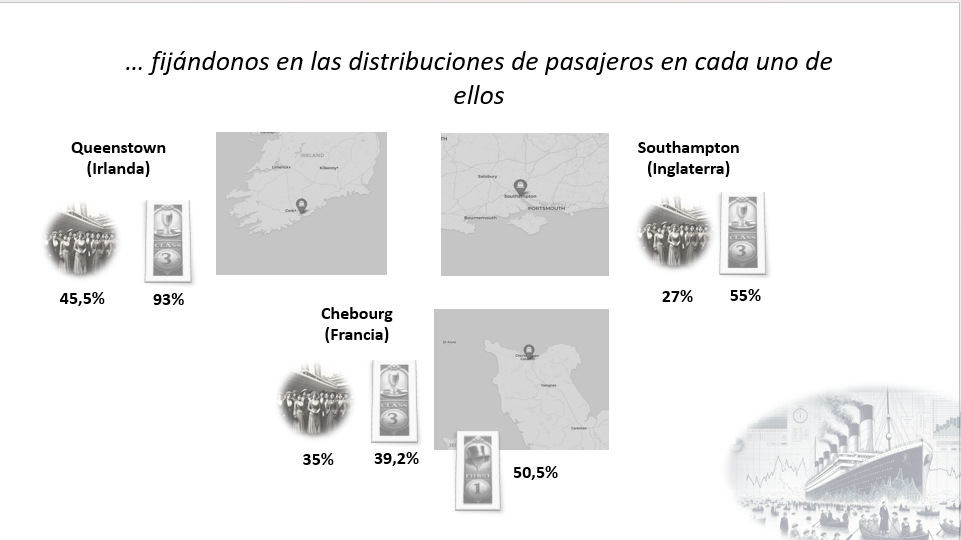

*Esta diapositiva no es buena, tiene demasiada información y no está correctamente destacada, pero es lo mejor que podemos con el tiempo disponible para el ejercicio.*  

*Necesitariamos más tiempo para explicar la influencia de cada factor en el resultado global de cada puerto.*

*Para terminar, como ya hemos abierto la presentación con las conclusiones, pues no vamos a repetir la diapositiva, pero en vuestros EDAs os recomendamos que cerréis con las conclusiones del estudio e incluso puede ser recomendable incluir una slide adicional con "Futuros pasos" o algo similar donde hablemos de las cosas que se han quedado fuera del alcance del estudio y sería interesante comprobar.*